Dada la ecuación:
    
\begin{eqnarray}
\frac{dr}{dt}&=&-k_1 r ,\\
\frac{d\mu}{dt}&=&k_1 r -k_2 \mu 
\end{eqnarray}

In [3]:
import scipy as sc
import numpy as np
import sympy as sy
import matplotlib.pylab as plt
import pylab as py
from scipy.optimize import fsolve
%matplotlib inline

In [20]:
#ceroclinas

#ceroclina de dr/dt es r=0

def  cero_mu(r,k1,k2):
    return (k1/k2)*r

# Condiciones iniciales y parámetros
k1= 1.0
k2= 2.0

R = np.arange(0,2,0.01)
y_0= cero_mu(R, k1,k2)

#punto fijo
pf=([0,0])

In [21]:
X , Y  = np.meshgrid(np.arange(0,2,0.2), np.arange(0,2,0.2))          
U = -k1*X
V = k1*X-k2*Y                            
M = (np.hypot(U, V))                            
M[ M == 0] = 1.                                 
U /= M                                          
V /= M

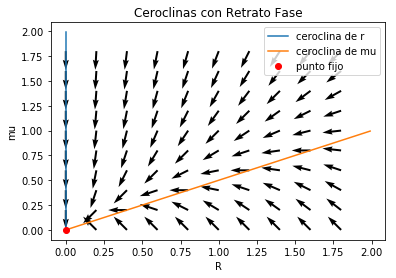

In [24]:
axes = plt.gca()
plt.plot(np.zeros(len(R)), R, label="ceroclina de r")
plt.plot(R, y_0, label="ceroclina de mu")
plt.quiver(X,Y,U,V)
plt.plot(pf[0], pf[1], 'ro', label="punto fijo")
#axes.set_ylim([-0.1,0.2])
plt.xlabel('R')
plt.ylabel('mu')
plt.legend()
plt.title('Ceroclinas con Retrato Fase')
plt.show()

In [40]:
#Matriz jacobiana simbólica
from sympy import Matrix
from sympy.abc import x,y
from sympy import *
from numpy import *

M1 = Matrix([-k1*x,k1*x-k2*y])
M2 = Matrix([x, y])
J = M1.jacobian(M2)
J=J.subs(x,0)
J=J.subs(y,0)
J=np.array(J).astype(np.float64)

In [43]:
from numpy import *

lambda1, lambda2 = linalg.eigvals(J)
A=J[0,0]
B=J[0,1]
C=J[1,0]
D=J[1,1]
n1=(A+D)/2
n2=((A-D)**2)+(4*B*C)


if n1 < 0:
    print("El punto es estable")
else:
    print("El punto es inestable")

if n2 < 0:
    print("Tiene eigenvalores imaginarios")
    print("L1=", lambda1, "L2=", lambda2)
    print("Se trata de un foco")
else:
    print("Tiene valores reales")
    if abs(A+D)>abs(sqrt(n2)):
        print("los eigenvalores tienen signo igual")
        print("L1=", lambda1, "L2=", lambda2)
        print("Se trata de un nodo")
    elif abs(A+D)<abs(sqrt(n2)):
        print("los eigenvalores tienen signo contrario")
        print("L1=", lambda1, "L2=", lambda2)
        print("Se trata de un punto silla")

El punto es estable
Tiene valores reales
los eigenvalores tienen signo igual
L1= -2.0 L2= -1.0
Se trata de un nodo


Para pasar de un sistema de ecuaciones ordinarias a una ecuación diferencial de segundo orden tenemos:

\begin{eqnarray}
\frac{dr}{dt}&=&-k_1 r ,\\
\frac{d\mu}{dt}&=&k_1 r -k_2 \mu 
\end{eqnarray}

Queremos llegar a:

\begin{equation}
\frac{d^2 x}{dt^2}=A\frac{dx}{dt}+Bx
\end{equation}

Sacamos la segunda derivada de la segunda ecuación del sistema y substituímos dr/dt

\begin{equation}
\frac{d^2 \mu}{dt^2}=k_1\frac{dr}{dt}-k_2\frac{d\mu}{dt}=k_1(-k_1 r)-k_2\frac{d\mu}{dt}
\end{equation}

Se la segunda ecuación del sistema despejamos r y substituímos para tener todo en función de mu

\begin{equation}
\frac{d^2 \mu}{dt^2}=k_1\left(-k_1 \left(\frac{k_2}{k_1} \mu +\frac{1}{k_1}\frac{d\mu}{dt}\right)\right)-k_2\frac{d\mu}{dt}
\end{equation}

\begin{equation}
\frac{d^2 \mu}{dt^2}=k_1\left(- \left(k_2 \mu +\frac{d\mu}{dt}\right)\right)-k_2\frac{d\mu}{dt}=-(k_1 +k_2)\frac{d\mu}{dt}+k_1 k_2 \mu
\end{equation}

Sea $A= -(k_1+k_2)$ y $B=k_1k_2$ 

Por lo que obtenemos:

\begin{equation}
\frac{d^2 \mu}{dt^2}=A\frac{d\mu}{dt}+Bx
\end{equation}

La solución es de la forma:

\begin{equation}
\mu(t)=C_1 e^{\lambda_1 t}+C_1 e^{\lambda_2 t}
\end{equation}

Como ya habíamos obtenido previamente los valores propios que son: $\lambda_1= -2.0, \lambda_2= -1.0$

\begin{equation}
\mu(t)=C_1 e^{-2 t}+C_1 e^{- t}
\end{equation}

Dadas las condiciones iniciales  $r(0)=r_0$ y $\mu(0)=0$

\begin{equation}
\mu(0)=C_1 +C_1 = 0 \rightarrow C_1=-C_2=C
\end{equation}

\begin{equation}
\mu(t)=C (e^{-2 t}- e^{- t})
\end{equation}

Por otro lado, la solución para $r$ queda de la forma $r(t)= r_0 e^{-t}$ y sustituyendo en la segunda ecuación del sistema de ecuaciones obtenemos el valor de C.

\begin{eqnarray}
\frac{d\mu}{dt}&=&k_1 r -k_2 \mu \\
C(-2e^{-2 t}+ e^{- t})&=& r_0 e^{-t}-2C (e^{-2 t}- e^{- t})\\
C(-2e^{-2 t}+ e^{- t}+2e^{-2 t}- 2e^{- t} &=&r_0 e^{-t}\\
C(-e^{- t})&=&r_0 e^{-t}
C=-r_0
\end{eqnarray}

Por lo tanto las soluciones quedan de la forma:

\begin{eqnarray}
\mu(t)&=&r_0 (e^{-t}- e^{- 2t})\\
r(t)&=& r_0 e^{-t}
\end{eqnarray}

